In [1]:
# Importing Qiskit

import qiskit as q
%matplotlib inline

In [3]:
# Check qiskit version
q.__qiskit_version__

{'qiskit-terra': '0.16.1',
 'qiskit-aer': '0.7.1',
 'qiskit-ignis': '0.5.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.1',
 'qiskit': '0.23.1'}

In [4]:
# Create a circuit with two quantum bits and two classical bits
circuit = q.QuantumCircuit(2, 2)

# Apply Hadamard(H) gate for the first qubit
circuit.h(0)

# Controlled NOT gate (CNOT) applied to 0 and 1 qubits.
circuit.cx(0, 1)

# Measure qubits in classical bits
circuit.measure([0, 1], [0, 1])

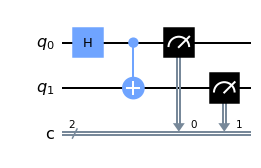

In [5]:
# Draw the circuit
circuit.draw(output = 'mpl')

In [6]:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [7]:
# Execute circuit using Qiskit's  simulator

simulator = q.Aer.get_backend('qasm_simulator')

# Execute the circuit using the simulator. It will run for 1000 times.

job = q.execute(circuit, simulator, shots = 1000)

In [8]:
# Results from the job

results_sim_loc = job.result()
results_sim_loc

Result(backend_name='qasm_simulator', backend_version='0.7.1', qobj_id='474901d9-900c-4090-bb6b-62c6270362fb', job_id='b02d1525-a6b3-4592-acd8-62a658821c35', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x0': 515, '0x3': 485}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit7', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=3427232322, time_taken=0.0030222170000000002, metadata={'fusion': {'enabled': False}, 'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 8})], date=2020-12-03T22:33:26.649590, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='0.7.1'), metadata={'max_memory_mb': 3929, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.003129801}, time_taken=0.00333380699

In [9]:
counts_sim_loc = results_sim_loc.get_counts(circuit)
counts_sim_loc

{'00': 515, '11': 485}

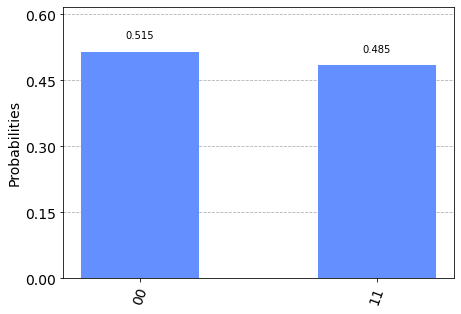

In [10]:
# Create a histogram of counts

from qiskit.visualization import plot_histogram

plot_histogram(counts_sim_loc)

## Run the Circuit on IBM Quantum Experience simulator

In [12]:
from qiskit import IBMQ

IBMQ.load_account()

/home/batman/anaconda3/envs/qp/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-12-03 22:41:45,118: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [13]:
# Select IBM Quantum Experience as provider

provider = IBMQ.get_provider("ibm-q")

# List available backends

backends = provider.backends()
backends

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [15]:
from qiskit.tools.monitor import job_monitor

# Select IBM simulator as the backend for the circuit to run

backend = provider.get_backend('ibmq_qasm_simulator')

# Execute circuit on the new backend

job = q.execute(circuit, backend, shots = 1000)

# Get live updates on job status
job_monitor(job)

Job Status: job has successfully run


In [16]:
# Results from the job

results_sim_ibm = job.result()
results_sim_ibm

Result(backend_name='ibmq_qasm_simulator', backend_version='0.7.0', qobj_id='e671167f-b249-4106-a171-7e5edcb6d62c', job_id='5fc91f8826d87e0019d53a86', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x0': 533, '0x3': 467}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit7', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, metadata={'fusion': {'enabled': False}, 'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 16}, seed_simulator=4024448705, time_taken=0.001546068)], date=2020-12-03 22:55:33.699484+05:30, status=COMPLETED, status=QobjHeader(backend_name='ibmq_qasm_simulator', backend_version='0.1.547'), metadata={'max_memory_mb': 257936, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0016207910000000001}, time_taken=0.00

In [17]:
counts_sim_ibm = results_sim_ibm.get_counts(circuit)
counts_sim_ibm

{'00': 533, '11': 467}

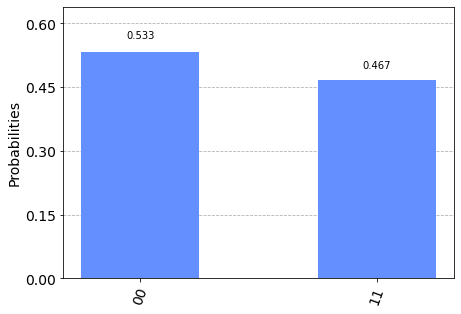

In [18]:
# Create a histogram of counts

plot_histogram(counts_sim_ibm)

## Run the Circuit on a real Quantum Computer

In [19]:
from qiskit.providers.ibmq import least_busy

# Select least busy device from all active devices offered in IBM Quantum Experience that has more than 1 qubit

backend = least_busy(provider.backends(operational = True, simulator = False, status_msg = 'active', filters=lambda x: x.configuration().n_qubits > 1))

In [21]:
print("Looks like the job will be executed on {}. It has {} pending jobs right now.".format(backend, backend.status().pending_jobs))

Looks like the job will be executed on ibmq_athens. It has 30 pending jobs right now.


In [22]:
# Execute the circuit on the quantum computer

job = q.execute(circuit, backend, shots = 1000)
job_monitor(job)

Job Status: job has successfully run


In [23]:
# Results from the job

results_ibm = job.result()
results_ibm

Result(backend_name='ibmq_athens', backend_version='1.3.1', qobj_id='fc9a054a-b4b0-42c7-a8ac-190a4ee849e8', job_id='5fc9242bce62e6001a5bded6', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 478, '0x1': 25, '0x2': 16, '0x3': 481}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=5, name='circuit7', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), memory=False)], date=2020-12-04 00:14:04+05:30, status=Successful completion, status=QobjHeader(backend_name='ibmq_athens', backend_version='1.3.1'), time_taken=10.24961233139038, execution_id='7eb0f22e-3597-11eb-a934-b02628ea1e00', client_version={'qiskit': '0.23.1'})

In [24]:
counts_ibm = results_ibm.get_counts(circuit)
counts_ibm

{'00': 478, '01': 25, '10': 16, '11': 481}

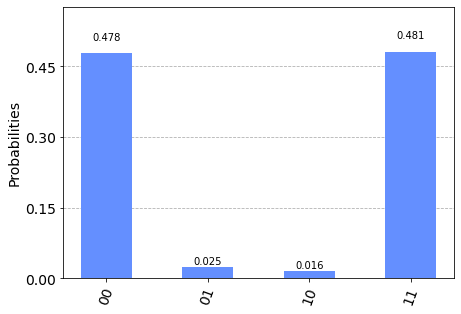

In [25]:
# Create a histogram of counts

plot_histogram(counts_ibm)

## Histogram to compare results from three different backends

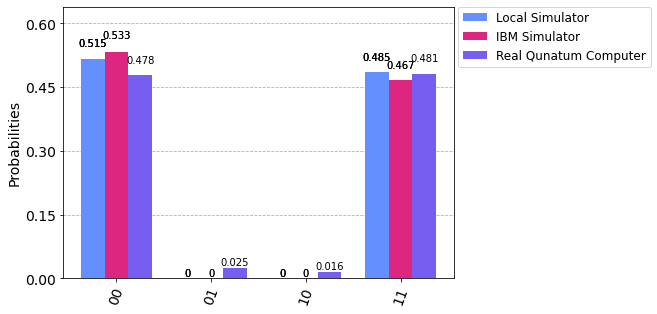

In [27]:
plot_histogram([counts_sim_loc, counts_sim_ibm, counts_ibm], legend = ['Local Simulator', 'IBM Simulator', 'Real Qunatum Computer'])